In [1]:
import pandas as pd
import re 
from nltk.corpus import stopwords
from collections import Counter
import plotly.express as px
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jbanas/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
df = pd.read_csv('datasets/train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [3]:
df.describe(include='all')

,id,keyword,location,text,target
count,7613.000000,7552,5080,7613,7613.00000
unique,NaN,221,3341,7503,NaN
top,NaN,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...,NaN
freq,NaN,45,104,10,NaN
mean,5441.934848,NaN,NaN,NaN,0.42966
std,3137.116090,NaN,NaN,NaN,0.49506
min,1.000000,NaN,NaN,NaN,0.00000
25%,2734.000000,NaN,NaN,NaN,0.00000
50%,5408.000000,NaN,NaN,NaN,0.00000
75%,8146.000000,NaN,NaN,NaN,1.00000


In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df['text'].duplicated().sum()

np.int64(110)

In [6]:
print("\nMissing Values per Column:\n", df.isnull().sum())


Missing Values per Column:
 id             0
keyword       61
location    2533
text           0
target         0
dtype: int64


In [7]:
target_counts = df['target'].value_counts().reset_index()
target_counts.columns = ['target', 'count']
target_counts['target'] = target_counts['target'].map({0: 'Not Disaster', 1: 'Disaster'})

fig_target = px.bar(target_counts, x='target', y='count',
                    title='Distribution of Target Variable',
                    labels={'count': 'Number of Tweets', 'target': 'Tweet Type'},
                    text_auto=True)
fig_target.update_layout(xaxis_title="Tweet Type (0: Not Disaster, 1: Disaster)")
fig_target.show()


In [8]:
df['text_length'] = df['text'].astype(str).apply(len)
df['word_count'] = df['text'].astype(str).apply(lambda x: len(x.split()))

In [9]:
fig_hist_len = px.histogram(df, x='text_length', color='target',
                           marginal='box',
                           hover_data=df.columns,
                           title='Text Length Distribution by Target',
                           labels={'text_length': 'Text Length (Characters)', 'target': 'Target (0: No, 1: Yes)'},
                           barmode='overlay')
fig_hist_len.show()

In [10]:

fig_hist_word = px.histogram(df, x='word_count', color='target',
                            marginal='box',
                            hover_data=df.columns,
                            title='Word Count Distribution by Target',
                            labels={'word_count': 'Word Count', 'target': 'Target (0: No, 1: Yes)'},
                            barmode='overlay')
fig_hist_word.show()

In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE) # Remove URLs
    text = re.sub(r'\@\w+|\#','', text) # Remove mentions and hashtags
    text = re.sub(r'[^\w\s]', '', text) # Remove punctuation
    text_tokens = text.split()
    stop_words = set(stopwords.words('english'))
    filtered_words = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_words)

def get_top_words(corpus, n=20):
    words = " ".join(corpus).split()
    count = Counter(words)
    most_common = count.most_common(n)
    return pd.DataFrame(most_common, columns=['Word', 'Frequency'])

# Apply cleaning before analysis
cleaned_text_disaster = df[df['target'] == 1]['text'].apply(clean_text)
cleaned_text_non_disaster = df[df['target'] == 0]['text'].apply(clean_text)

print("\nTop 20 words in Disaster Tweets:")
print(get_top_words(cleaned_text_disaster))

print("\nTop 20 words in Non-Disaster Tweets:")
print(get_top_words(cleaned_text_non_disaster))


Top 20 words in Disaster Tweets:
          Word  Frequency
0         fire        178
1         news        135
2          via        121
3     disaster        117
4   california        111
5      suicide        110
6       police        107
7          amp        106
8       people        105
9       killed         93
10        like         92
11   hiroshima         86
12       fires         85
13       storm         85
14       crash         84
15          us         81
16    families         81
17       train         79
18   emergency         76
19   buildings         75

Top 20 words in Non-Disaster Tweets:
      Word  Frequency
0     like        253
1       im        243
2      amp        192
3      new        168
4      get        163
5     dont        141
6      one        127
7     body        112
8      via         99
9    would         97
10   video         96
11  people         90
12    love         89
13       2         86
14    know         85
15    back         84
16      

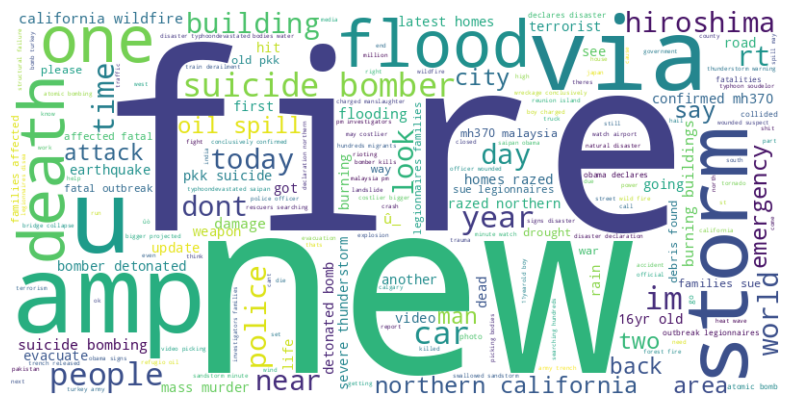

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(cleaned_text_disaster))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()